##  비선형 활성화 함수(Activation function) 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

#### 계단 함수(Step function)

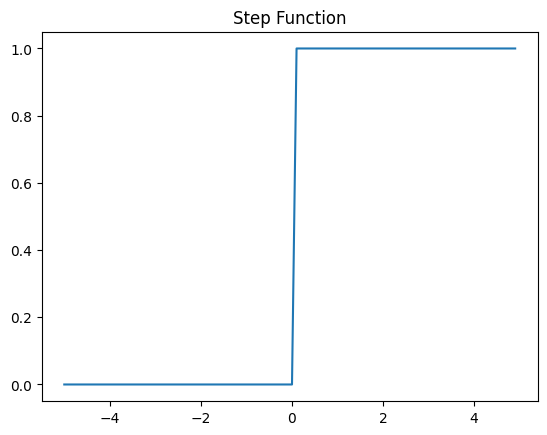

In [29]:
def step(x):
    return np.array(x > 0)
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

#### 활성화 함수의 특징 - 비선형 함수(Nonlinear function)
- 활성화 함수는 선형 함수가 아닌 비선형 함수여야 함.
- 선형 함수란 출력이 입력의 상수배만큼 변하는 함수 -> 그래프를 그리면 직선 
- 비선형 함수는 직선 1개로는 그릴 수 없는 함수

- 인공 신경망의 능력을 높이기 위해서는 은닉층을 계속해서 추가해야 함 그런데 만약 활성화 함수로 선형 함수를 사용하게 되면 은닉층을 쌓을 수가 없음 -> 선형 함수로는 은닉층을 여러번 추가하더라도 1회 추가한 것과 차이가 거의 없음
- 선형 함수를 사용한 층이 아무 의미가 없다는 뜻이 아님 학습 가능한 가중치가 새로 생긴다는 점에서 분명히 의미가 있음
- 선형 함수를 사용한 층을 활성화 함수를 사용하는 은닉층과 구분하기 위해서 선형층(linear layer)이나 투사층(projection layer) 등의 다른 표현을 사용하여 표현하기도 함
- 활성화 함수를 사용하는 일반적인 은닉층을 선형층과 대비되는 표현을 사용하면 비선형층(nonlinear layer)이라고 함

#### 시그모이드 함수(Sigmoid function)와 기울기 소실

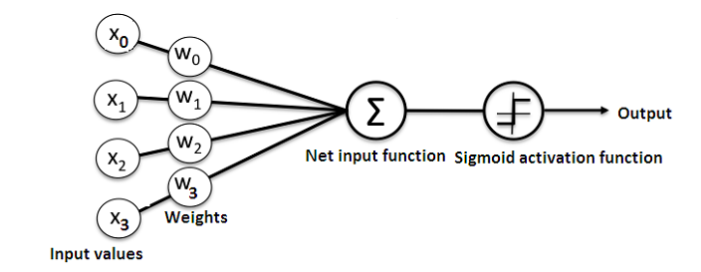

- 시그모이드 함수의 문제점은 미분을 해서 기울기(gradient)를 구할 때 발생

#### 시그모이드 함수(Sigmoid function)

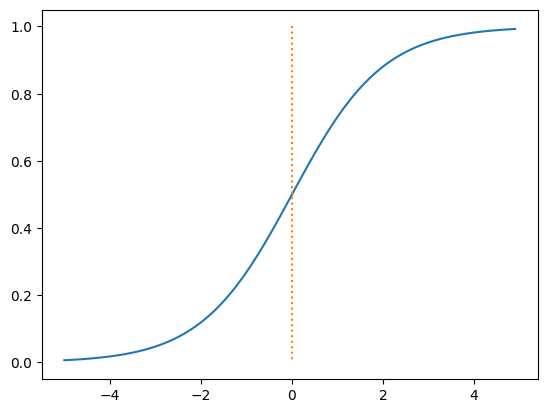

In [15]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1/(1+np.exp(-x))


x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0, 0], [1.0, 0.0], ':')
plt.show()

- 위 그래프를 시그모이드 함수의 출력값이 0 또는 1에 가까워지면, 그래프의 기울기가 완만해지는 모습을 볼 수 있음

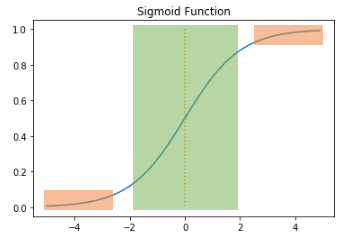

- 주황색 부분은 기울기를 계산하면 0에 가까운 아주 작은 값이 나오게 된다. 

- 그런데 역전파 과정에서 0에 가까운 아주 작은 기울기가 곱해지게 되면, 앞단에는 기울기가 잘 전달되지 않게 됨 = 기울기 소실(Vanishing Gradient) 문제

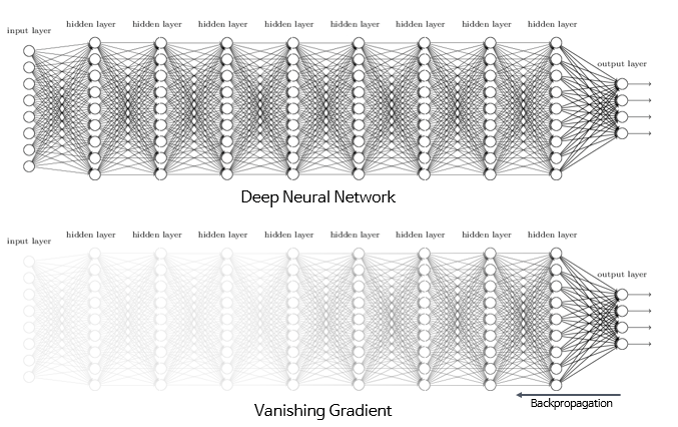

- 결론적으로 시그모이드 함수를 은닉층에서 사용하는 것은 지양

#### 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)

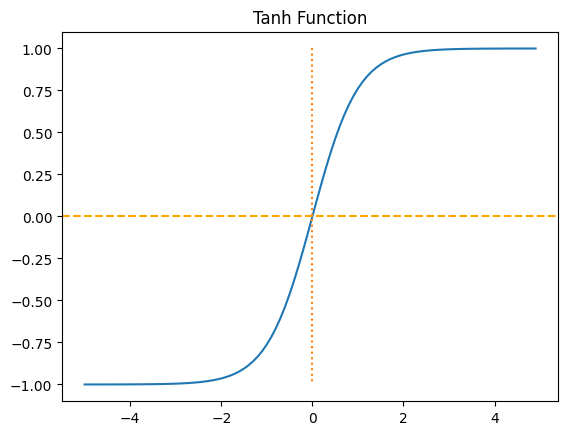

In [17]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

- 하이퍼볼릭탄젠트 함수의 경우에는 시그모이드 함수와는 달리 0을 중심으로 하고 있는데, 이때문에 시그모이드 함수와 비교하면 반환값의 변화폭이 더 큼. 그래서 시그모이드 함수보다는 기울기 소실 증상이 적은 편
- 은닉층에서 시그모이드 함수보다는 많이 사용

#### 렐루 함수(ReLU)

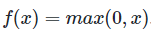

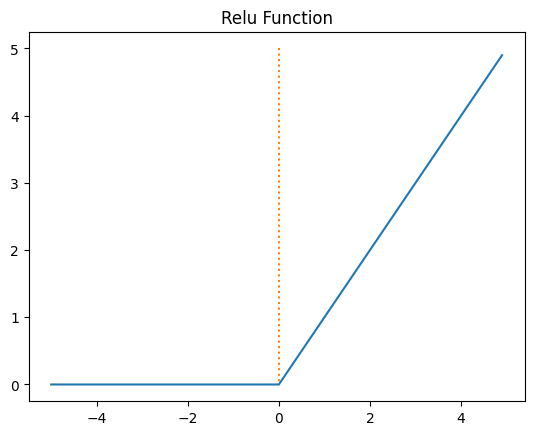

In [23]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0], [5, 0], ':')
plt.title('Relu Function')
plt.show()

- 특정 양수 값에 수렴하지 않아서 시그모이드 함수보다 훨씬 더 잘 작동
- 연산 속도 빠름 
- 그러나, 입력값이 음수면 기울기도 0이된다. -> 죽은 렐루(dying ReLU)

#### 리키 렐루(Leaky ReLU)

- 죽은 렐루를 보안하기 위해 나옴 
- Leaky ReLU는 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환하도록 되어있음

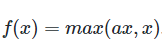

In [24]:
a = 0.1 

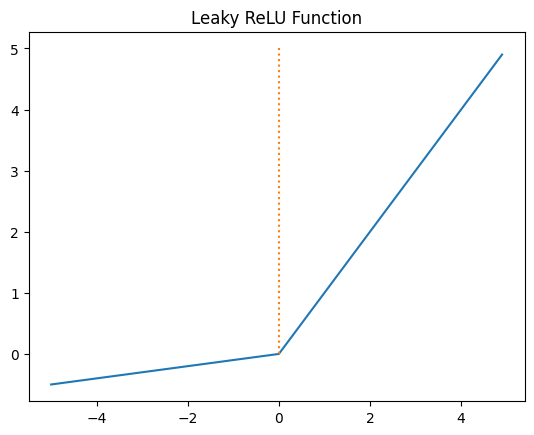

In [25]:
def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

#### 소프트맥스 함수(Softamx function)

- 은닉층에서 ReLU(또는 ReLU 변형) 함수들을 사용하는 것이 일반적이지만 그렇다고 해서 앞서 배운 시그모이드 함수나 소프트맥스 함수가 사용되지 않는다는 의미는 아님
- 분류 문제를 로지스틱 회귀와 소프트맥스 회귀를 출력층에 적용하여 사용

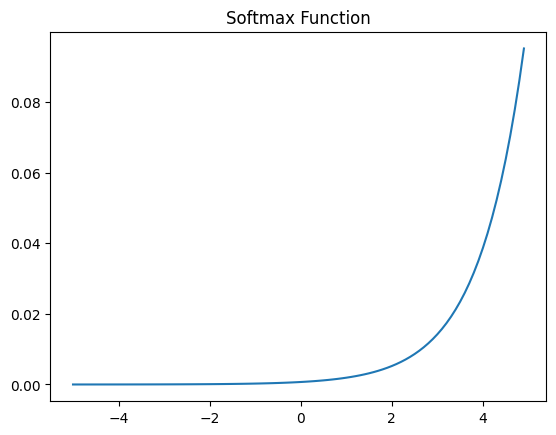

In [27]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title("Softmax Function")
plt.show()

#### 출력층의 활성화 함수와 오차 함수의 관계

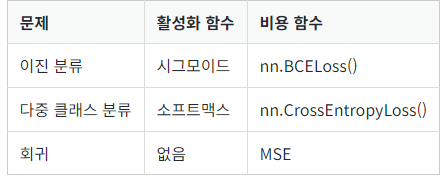

- 시그모이드 함수의 또 다른 문제점은 원점 중심이 아니라는 점(Not zero-centered). 따라서, 평균이 0이 아니라 0.5이며, 시그모이드 함수는 항상 양수를 출력하기 때문에 출력의 가중치 합이 입력의 가중치 합보다 커질 가능성이 높습니다. 이것을 편향 이동(bias shift)이라 하며, 이러한 이유로 각 레이어를 지날 때마다 분산이 계속 커져 가장 높은 레이어에서는 활성화 함수의 출력이 0이나 1로 수렴하게 되어 기울기 소실 문제가 일어날 수 있음

- 하이퍼볼릭탄젠트 함수는 원점 중심(zero-centered)이기 때문에, 시그모이드와 달리 편향 이동은 일어나지 않음. 하지만, 하이퍼볼릭탄젠트 함수 또한 입력의 절대값이 클 경우 -1이나 1로 수렴하게 되는데 시그모이드 함수와 마찬가지로 이때 기울기가 완만해지므로 역시나 기울기 소실 문제가 일어날 수 있음

- 스탠포드 대학교의 딥 러닝 강의 cs231n에서는 ReLU를 먼저 시도해보고, 그다음으로 LeakyReLU나 ELU 같은 ReLU의 변형들을 시도해보며, sigmoid는 사용하지 말라고 권장